# Tiktok Transcript Analysis

What does this notebook tell us:
* Which ingredient is more popular?
* Which Beiersdorf brand is more popular?
* Which routine is more popular for evening or morning?



We have a kaggle dataset for cosmetics brands and the categories

In [ ]:
import pandas as pd
tiktok_transcrips = pd.read_csv('../../data/filtered_data/comments_posts_transcripts.csv')
cosmetics=pd.read_csv("../../data/static_data/most_used_beauty_cosmetics_products_extended_from_kaggle.csv")

In [7]:
len(tiktok_transcrips['post_id'].unique())

3156

Combining the transcripts and the video description. 

In [8]:

tiktok_transcrips['combined_text'] = tiktok_transcrips['transcribed_text'].fillna('') + " " + tiktok_transcrips['video_description'].fillna('')
tiktok_transcrips['combined_text'] = tiktok_transcrips['combined_text'].str.lower()


**BRANDS from Cosmetics (Kaggle Dataset)**

In [9]:
cosmetics.columns

Index(['Product_Name', 'Brand', 'Category', 'Usage_Frequency', 'Price_USD',
       'Rating', 'Number_of_Reviews', 'Product_Size', 'Skin_Type',
       'Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Cruelty_Free',
       'Country_of_Origin'],
      dtype='object')

In [10]:
print(len(cosmetics['Brand'].unique())) #40 brands
cosmetics['Brand'].unique()

40


array(['Drunk Elephant', 'Laura Mercier', 'Natasha Denona', 'Ilia Beauty',
       'Charlotte Tilbury', 'Danessa Myricks', 'Bourjois', 'IT Cosmetics',
       'Fenty Beauty', 'Sisley', 'Juvia’s Place', 'NARS', 'ColourPop',
       'Huda Beauty', 'Tatcha', 'Kiehl’s', 'Tarte', 'Glossier',
       'Make Up For Ever', 'Anastasia Beverly Hills', 'E.l.f.',
       'Hourglass', 'Pat McGrath Labs', 'Too Faced', 'Perricone MD',
       'RMS Beauty', 'Urban Decay', 'Rare Beauty', 'Becca', 'Patrick Ta',
       'Shiseido', 'Kylie Cosmetics', 'Bite Beauty', 'Yves Saint Laurent',
       'Bobby Brown', 'Farsali', 'Morphe', 'Milk Makeup', 'Clinique',
       'KVD Beauty'], dtype=object)

In [11]:
print(len(cosmetics['Category'].unique())) #24 categories
cosmetics['Category'].unique()

24


array(['Blush', 'Makeup Remover', 'Highlighter', 'Face Mask',
       'Foundation', 'Powder', 'Lip Gloss', 'CC Cream', 'Eye Shadow',
       'Concealer', 'Eyeliner', 'Lipstick', 'Setting Spray', 'Cleanser',
       'Bronzer', 'Primer', 'Face Oil', 'Contour', 'Mascara', 'Serum',
       'BB Cream', 'Exfoliator', 'Lip Liner', 'Moisturizer'], dtype=object)

In [12]:
print(len(cosmetics['Skin_Type'].unique())) #5 categories
cosmetics['Skin_Type'].unique()

5


array(['Sensitive', 'Dry', 'Normal', 'Oily', 'Combination'], dtype=object)

In [13]:
print(len(cosmetics['Main_Ingredient'].unique())) #7 categories
cosmetics['Main_Ingredient'].unique()

7


array(['Retinol', 'Shea Butter', 'Aloe Vera', 'Glycerin',
       'Hyaluronic Acid', 'Vitamin C', 'Salicylic Acid'], dtype=object)

**Tiktok_Transcripts**

In [14]:
tiktok_transcrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34830 entries, 0 to 34829
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        34830 non-null  int64  
 1   text                           34792 non-null  object 
 2   textLanguage                   34830 non-null  object 
 3   createTimeISO                  34830 non-null  object 
 4   isAd                           34830 non-null  bool   
 5   author_nickName                34830 non-null  object 
 6   author_signature               34277 non-null  object 
 7   author_fans                    34830 non-null  int64  
 8   video_duration                 34830 non-null  int64  
 9   webVideoUrl                    34830 non-null  object 
 10  diggCount                      34830 non-null  int64  
 11  shareCount                     34830 non-null  int64  
 12  playCount                      34830 non-null 

In [16]:
tiktok_transcrips.groupby('detected_language').count().sort_values(by ='post_id',ascending=False)

,post_id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,webVideoUrl,...,comment,diggCount_comment,replyCommentTotal_comment,uniqueId_comment,transcribed_text,video_description,bucketUrl,date,comment_lang,combined_text
detected_language,,,,,,,,,,,,,,,,,,,,,
English,20225,20225,20225,20225,20225,20225,19932,20225,20225,20225,...,20225,20225,20225,20225,20156,20225,20225,20225,20225,20225
en,3282,3282,3282,3282,3282,3282,3237,3282,3282,3282,...,3282,3282,3282,3282,3273,3282,3282,3282,3282,3282
German,2581,2581,2581,2581,2581,2581,2547,2581,2581,2581,...,2581,2581,2572,2581,2581,2581,2581,2581,2581,2581
Unknown,758,758,758,758,758,758,749,758,758,758,...,758,758,758,758,286,758,758,758,758,758
Spanish,431,431,431,431,431,431,424,431,431,431,...,431,431,431,431,431,431,431,431,431,431
Portuguese,331,331,331,331,331,331,331,331,331,331,...,331,331,331,331,329,331,331,331,331,331
No,310,310,310,310,310,310,304,310,310,310,...,310,310,310,310,308,310,310,310,310,310
Korean,282,282,282,282,282,282,282,282,282,282,...,282,282,282,282,245,282,282,282,282,282
French,241,241,241,241,241,241,238,241,241,241,...,241,241,241,241,241,241,241,241,241,241


**Cleaning the English to en and German to de**

In [17]:
tiktok_transcrips['detected_language'] = tiktok_transcrips['detected_language'].replace({'English': 'en'})
tiktok_transcrips['detected_language'] = tiktok_transcrips['detected_language'].replace({'German': 'de'})

If we filter out the languages we loose about 1000 transcripts

In [19]:
tiktok_transcrips['detected_language'].unique()

array([nan, 'de', 'en', 'Indonesian', 'Spanish', 'Ukrainian', 'French',
       'Nepali', 'N', 'Unknown', 'Korean', 'No', 'Undetermined', 'Uyghur',
       'Music', 'no', 'Filipino', 'Punjabi', 'um', 'Hindi', 'Arabic',
       'Russian', 'Somali', 'Khmer', 'Chinese', 'Portuguese', 'Albanian',
       'Not', 'es', 'Swahili', 'Amharic', 'Japanese', 'Italian', 'Dutch',
       'Turkish', 'Urdu', 'Tigrinya', 'Burmese', 'Mandarin', 'Norwegian',
       'ko', 'Greek', 'Zulu', 'Thai', 'Macedonian', 'Polish', 'ar',
       'Vietnamese', 'Romanian', 'Danish'], dtype=object)

In [20]:
tiktok_transcrips[tiktok_transcrips['detected_language']=='de'].head(2)

,post_id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,webVideoUrl,...,diggCount_comment,replyCommentTotal_comment,uniqueId_comment,detected_language,transcribed_text,video_description,bucketUrl,date,comment_lang,combined_text
1,7472508255441276182,☞𝕎𝕖𝕣𝕓𝕦𝕟𝕘☜ 🔻Produktvorstellung🔻 ᗰᗩᒪ Gᗩᑎᘔ EᕼᖇᒪIᑕ...,de,2025-02-17 21:48:32+00:00,False,Nicki.sally.testet,NaN,1145,36,https://www.tiktok.com/@nicki.sally.testet/vid...,...,1,0.0,elashins.world,de,"Mal ganz ehrlich, wer hat keinen Schrank bei s...",This video promotes two Lancome products for a...,https://storage.cloud.google.com/capstone-soci...,2025-02-17,de,"mal ganz ehrlich, wer hat keinen schrank bei s..."
2,7472508255441276182,☞𝕎𝕖𝕣𝕓𝕦𝕟𝕘☜ 🔻Produktvorstellung🔻 ᗰᗩᒪ Gᗩᑎᘔ EᕼᖇᒪIᑕ...,de,2025-02-17 21:48:32+00:00,False,Nicki.sally.testet,NaN,1145,36,https://www.tiktok.com/@nicki.sally.testet/vid...,...,3,1.0,dies_und_das_allz,de,"Mal ganz ehrlich, wer hat keinen Schrank bei s...",This video promotes two Lancome products for a...,https://storage.cloud.google.com/capstone-soci...,2025-02-17,en,"mal ganz ehrlich, wer hat keinen schrank bei s..."


detected_language is the transcribed_text language which is not necessarily the same form that of video_description

In [17]:
tiktok_transcrips['video_description_lang'].unique()

array(['sq', 'en', 'it', 'de', 'pt', 'es', 'pl', 'unknown', 'am', 'fr',
       'id', 'ro', 'ru', 'tr', 'ar', 'ja', 'el', 'la'], dtype=object)

In [26]:
tiktok_transcrips_filtered = tiktok_transcrips[tiktok_transcrips['detected_language'].isin(['en', 'de'])]
len(tiktok_transcrips_filtered['post_id'].unique())

2197

Filtering out the status of completed ai transcriptions from failed

In [29]:
transcripts_text_filtered=tiktok_transcrips_filtered.copy()

In [30]:
transcripts_text_filtered.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'searchHashtag_name',
       'searchHashtag_views', 'location_address', 'comment_id',
       'comment_createTimeISO_comment', 'comment', 'diggCount_comment',
       'replyCommentTotal_comment', 'uniqueId_comment', 'detected_language',
       'transcribed_text', 'video_description', 'bucketUrl', 'date',
       'comment_lang', 'combined_text'],
      dtype='object')

### Basic Ingredients

In [32]:
basic_ingredients=ingredients = pd.read_csv('../../data/static_data/Ingredient_mapping.csv')



### Beiersdorf Products

In [33]:
beiersdorf_products=['nivea','eucerin','hansaplast','la prairie','chantecaille','coppertone','labello','8x4','hidrougal','tesa','florena','skin stories','gammon']



**Text Analysis for Beiersdorf Brands, Brands, Ingredients, Categories (blush, creams etc) and SkinType**

Counting the instances of basic Paula Choice ingridients.


In [34]:
tiktok_transcrips_filtered.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'searchHashtag_name',
       'searchHashtag_views', 'location_address', 'comment_id',
       'comment_createTimeISO_comment', 'comment', 'diggCount_comment',
       'replyCommentTotal_comment', 'uniqueId_comment', 'detected_language',
       'transcribed_text', 'video_description', 'bucketUrl', 'date',
       'comment_lang', 'combined_text'],
      dtype='object')

In [35]:
#convert to lowercase
tiktok_transcrips_filtered['combined_text'] = tiktok_transcrips_filtered['video_description'].fillna('').astype(str).str.lower()

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_22599/2914450645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_transcrips_filtered['combined_text'] = tiktok_transcrips_filtered['video_description'].fillna('').astype(str).str.lower()


In [36]:
def presence_col(text, keyword):
    return int(keyword in text)


## Beiersdorf products

In [37]:
product_mentions_df = pd.DataFrame()
for product in beiersdorf_products:
    product_mentions_df[product] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, product))

product_counts = product_mentions_df.sum().reset_index()
product_counts.columns = ['product', 'mention_count']

product_counts.sort_values(by='mention_count', ascending=False)

,product,mention_count
0,nivea,211
1,eucerin,42
3,la prairie,7
2,hansaplast,0
4,chantecaille,0
5,coppertone,0
6,labello,0
7,8x4,0
8,hidrougal,0
9,tesa,0


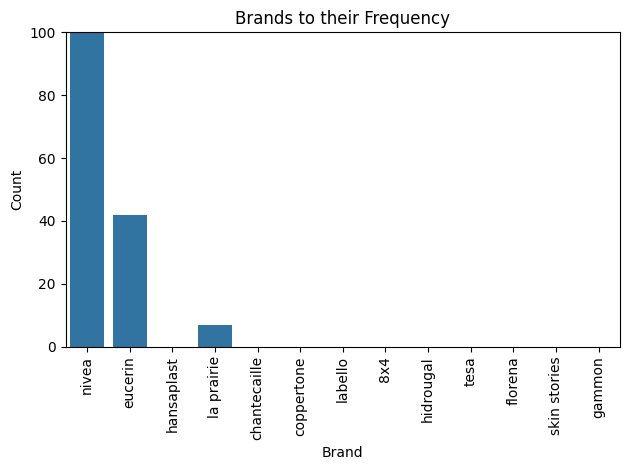

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='product', y='mention_count', data=product_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brands to their Frequency')

# Set the y-axis limit to 100
plt.ylim(0, 100
         )

# Display the plot
plt.tight_layout()
plt.show()

### Using the Cosmetics dataset from Kaggle

In [42]:
import numpy as np

# Assume Categories is the array
Categories = np.array([
    'Blush', 'Makeup Remover', 'Highlighter', 'Face Mask',
    'Foundation', 'Powder', 'Lip Gloss', 'CC Cream', 'Eye Shadow',
    'Concealer', 'Eyeliner', 'Lipstick', 'Setting Spray', 'Cleanser',
    'Bronzer', 'Primer', 'Face Oil', 'Contour', 'Mascara', 'Serum',
    'BB Cream', 'Exfoliator', 'Lip Liner', 'Moisturizer'
])

# Convert all elements to lowercase
Categories_lower = np.char.lower(Categories)

Brands=np.array(['Drunk Elephant', 'Laura Mercier', 'Natasha Denona', 'Ilia Beauty',
       'Charlotte Tilbury', 'Danessa Myricks', 'Bourjois', 'IT Cosmetics',
       'Fenty Beauty', 'Sisley', 'Juvia’s Place', 'NARS', 'ColourPop',
       'Huda Beauty', 'Tatcha', 'Kiehl’s', 'Tarte', 'Glossier',
       'Make Up For Ever', 'Anastasia Beverly Hills', 'E.l.f.',
       'Hourglass', 'Pat McGrath Labs', 'Too Faced', 'Perricone MD',
       'RMS Beauty', 'Urban Decay', 'Rare Beauty', 'Becca', 'Patrick Ta',
       'Shiseido', 'Kylie Cosmetics', 'Bite Beauty', 'Yves Saint Laurent',
       'Bobby Brown', 'Farsali', 'Morphe', 'Milk Makeup', 'Clinique',
       'KVD Beauty', 'La Roche Posay']
)

Brands_lower=np.char.lower(Brands)

SkinType= np.array(['Sensitive', 'Dry', 'Normal', 'Oily', 'Combination'])
SkinType_lower=np.char.lower(SkinType)




#### Categories 

In [43]:
categoriries_df = pd.DataFrame()

for category in Categories_lower:
    categoriries_df[category] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, category))


categories_count = categoriries_df.sum().reset_index()
categories_count.columns = ['category', 'mention_count']
categories_count.sort_values(by='mention_count', ascending=False)



,category,mention_count
19,serum,7171
23,moisturizer,4367
13,cleanser,3897
3,face mask,1708
4,foundation,576
6,lip gloss,478
9,concealer,405
0,blush,390
5,powder,379
18,mascara,346


#### Brands

In [44]:
Brands_df = pd.DataFrame()

for brand in Brands_lower:
    Brands_df[brand] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, brand))


brand_count = Brands_df.sum().reset_index()
brand_count.columns = ['brand', 'mention_count']
brand_count.sort_values(by='mention_count', ascending=False)



,brand,mention_count
16,tarte,161
27,rare beauty,111
40,la roche posay,81
4,charlotte tilbury,50
14,tatcha,47
11,nars,42
37,milk makeup,39
36,morphe,35
13,huda beauty,31
17,glossier,30


#### Skintype

In [45]:
SkinType = pd.DataFrame()

for skintype in SkinType_lower:
    SkinType[skintype] = tiktok_transcrips_filtered['combined_text'].apply(lambda x: presence_col(x, skintype))


skintype_count = SkinType.sum().reset_index()
skintype_count.columns = ['SkinType', 'mention_count']
skintype_count.sort_values(by='mention_count', ascending=False)

,SkinType,mention_count
1,dry,1649
0,sensitive,680
3,oily,348
2,normal,301
4,combination,243


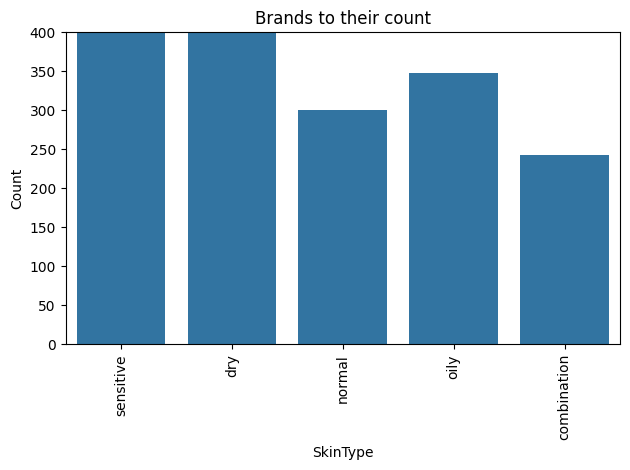

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='SkinType', y='mention_count', data=skintype_count)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('SkinType')
plt.ylabel('Count')
plt.title('Brands to their count')

# Set the y-axis limit to 100
plt.ylim(0, 400)

# Display the plot
plt.tight_layout()
plt.show()



## More Ingredient Analysis

In [48]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import locale
from datetime import datetime
from transformers import pipeline


# Set matplotlib to use English for dates
try:
    locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')
except locale.Error:
    locale.setlocale(locale.LC_TIME, 'C')

# Load and Prepare Data
df = pd.read_csv("../../data/filtered_data/comments_posts_transcripts.csv")

# Basic cleaning and filtering
df = df[df["comment"].notna() & (df["playCount"] > 0)].copy()
df["comment"] = df["comment"].astype(str).str.lower()
df["createTimeISO"] = pd.to_datetime(df["createTimeISO"])

# Filter to last 6 months
six_months_ago = pd.Timestamp(datetime.today() - pd.DateOffset(months=6), tz="UTC")
df = df[df["createTimeISO"] >= six_months_ago]

# Add week column
df["week"] = df["createTimeISO"].dt.to_period("W").dt.start_time

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_22599/1646608824.py:30: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week"] = df["createTimeISO"].dt.to_period("W").dt.start_time


Definition of ingredients

In [53]:
# Define a mapping of synonyms (EN/DE) to unified ingredient names from the file from Peaks & Pies
ingredient_map = pd.read_csv("../../data/static_data/Ingredient_mapping.csv")

Matching ingredients in comments

In [54]:
def find_ingredient(comment_text):
    if pd.isnull(comment_text):
        return []
    matched = set()
    for canonical, synonyms in ingredient_map.items():
        for term in synonyms:
            if re.search(rf"(?<!\w){re.escape(term)}(?!\w)", comment_text):
                matched.add(canonical)
                break
    return list(matched)

df["matched_ingredients"] = df["comment"].apply(find_ingredient)

# Common Routines

##### Basic counts of routine_steps

Here we have some routine steps that chatgpt and google defined. 

In [59]:


routine_steps = [
    'cleanse', 'double cleanse', 'toner', 'serum', 'moisturizer',
    'eye cream', 'sunscreen', 'exfoliate', 'mask', 'face massage',
    'treatment', 'essence', 'oil', 'spot treatment', 'primer'
]

# 4. Function to find routine steps mentioned in the text
def find_routine_steps(text, routine_steps_list):
    found = [step for step in routine_steps_list if step in text]
    return found

# 5. Apply the function to the combined text
tiktok_transcrips['found_routine_steps'] = tiktok_transcrips['combined_text'].apply(lambda x: find_routine_steps(x, routine_steps))


# 7. (Bonus) Create a frequency table of routine steps
# Explode list into rows
all_steps = tiktok_transcrips['found_routine_steps'].explode()

# Count occurrences
step_counts = all_steps.value_counts()

# Print most common steps
print("\nMost common skincare steps mentioned:")
step_counts



Most common skincare steps mentioned:


found_routine_steps
serum             10171
mask               7241
moisturizer        7131
cleanse            6363
oil                6068
toner              5941
sunscreen          3465
eye cream          2209
treatment          1799
essence            1291
exfoliate          1260
double cleanse      733
primer              570
spot treatment      287
face massage         93
Name: count, dtype: int64

##### Finding out the timing of the transcription

We try to find the time keywords in the transcripts based on some known keywords of time

In [60]:
# Step 1: Extract time-related keywords from the text
def find_time_of_day(text):
    time_keywords = ['morning', 'am', 'night', 'pm','start of the day', 'end of the day', 'evening']
    time_of_day = None

    # Check if any time-related keyword is in the text
    for keyword in time_keywords:
        if keyword in text:
            if 'morning' in keyword or 'am' in keyword or 'start of the day' in keyword:
                time_of_day = 'morning'
            elif 'night' in keyword or 'pm'  in keyword or 'end of the day' in keyword or 'evening' in keyword:
                time_of_day = 'night'
    
    return time_of_day

# Step 2: Function to identify which skincare routine steps are mentioned
def find_routine_steps(text, routine_steps_list):
    found = [step for step in routine_steps_list if step in text]
    return found


# Extract time of day and routine steps
tiktok_transcrips['time_of_day'] = tiktok_transcrips['combined_text'].apply(find_time_of_day)
tiktok_transcrips['found_routine_steps'] = tiktok_transcrips['combined_text'].apply(lambda x: find_routine_steps(x, routine_steps))

# Step 4: Exploding the found routine steps to count occurrences
exploded_routine_steps = tiktok_transcrips.explode('found_routine_steps')

# Step 5: Group by time of day and skincare routine step
routine_by_time = exploded_routine_steps.groupby(['time_of_day', 'found_routine_steps']).size().unstack(fill_value=0)

# Step 6: Calculate percentages for each routine step by time of day
routine_percentage_by_time = routine_by_time.div(routine_by_time.sum(axis=1), axis=0) * 100

# Print the percentage distribution of each routine step by time of day
print("Routine Step Percentages by Time of Day:")
routine_percentage_by_time





Routine Step Percentages by Time of Day:


found_routine_steps,cleanse,double cleanse,essence,exfoliate,eye cream,face massage,mask,moisturizer,oil,primer,serum,spot treatment,sunscreen,toner,treatment
time_of_day,,,,,,,,,,,,,,,
morning,10.287135,0.916308,2.470693,2.444725,4.281051,0.007419,11.440867,12.627986,11.459415,1.276154,20.496364,0.144680,7.285947,12.305238,2.556017
night,13.919047,2.216441,2.381548,1.941262,5.278431,0.340221,10.506829,14.219243,11.602542,0.765498,16.910992,1.080702,5.503577,9.596238,3.737429


#### Using the sentence, step, time and sentiment

Trying to separate the sentences within the transcripts


In [65]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

# Download tokenizer if not already
nltk.download('punkt')

# Step 1: Define routine steps and time keywords
routine_steps = [
    'cleanse', 'double cleanse', 'toner', 'serum', 'moisturizer',
    'eye cream', 'sunscreen', 'exfoliate', 'mask', 'face massage',
    'treatment', 'essence', 'oil', 'spot treatment', 'primer'
]

time_keywords = ['morning', 'am', 'night', 'pm', 'start of the day', 'end of the day', 'evening']

# Step 2: Combine and clean text
tiktok_transcrips['combined_text'] = (
    tiktok_transcrips['transcribed_text'].fillna('') + ' ' +
    tiktok_transcrips['video_description'].fillna('')
).str.lower()

# Step 3: Split text into sentences
tiktok_transcrips['sentences'] = tiktok_transcrips['combined_text'].apply(sent_tokenize)

# Step 4: Analyze each sentence
def analyze_sentence(sentence, routine_steps, time_keywords):
    results = []
    
    # Detect time of day
    time = None
    for keyword in time_keywords:
        if keyword in sentence:
            if keyword in ['morning', 'am', 'start of the day', 'begin the day','wake up']:
                time = 'morning'
            elif keyword in ['night', 'pm', 'evening', 'end of the day', 'before sleeping']:
                time = 'night'
            break
    
    # Sentiment
    sentiment_score = TextBlob(sentence).sentiment.polarity
    sentiment = 'positive' if sentiment_score > 0.1 else 'negative' if sentiment_score < -0.1 else 'neutral'

    # Routine steps
    steps_found = [step for step in routine_steps if step in sentence]

    for step in steps_found:
        results.append({
            'sentence': sentence,
            'step': step,
            'time_of_day': time,
            'sentiment': sentiment
        })
    
    return results

# Step 5: Apply to all rows
extracted_data = []

for _, row in tiktok_transcrips.iterrows():
    for sentence in row['sentences']:
        extracted_data.extend(analyze_sentence(sentence, routine_steps, time_keywords))

# Step 6: Create final DataFrame
df_sentence_level = pd.DataFrame(extracted_data)
#
# Optional: View counts
print(df_sentence_level.head())
print(df_sentence_level['time_of_day'].value_counts())
print(df_sentence_level['sentiment'].value_counts())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ritushetkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            sentence       step time_of_day  \
0   here’s a close-up clip of a woman getting a f...  treatment        None   
1  then, a sheet mask is placed on the woman's fa...       mask        None   
2                          génifique ultimate serum.      serum        None   
3  this video promotes two lancome products for a...      serum        None   
4                          génifique ultimate serum.      serum        None   

  sentiment  
0   neutral  
1   neutral  
2   neutral  
3  positive  
4   neutral  
time_of_day
morning    30325
night       2837
Name: count, dtype: int64
sentiment
neutral     69945
positive    32250
negative     6453
Name: count, dtype: int64


In [66]:
df_sentence_level.head()

,sentence,step,time_of_day,sentiment
0,here’s a close-up clip of a woman getting a f...,treatment,None,neutral
1,"then, a sheet mask is placed on the woman's fa...",mask,None,neutral
2,génifique ultimate serum.,serum,None,neutral
3,this video promotes two lancome products for a...,serum,None,positive
4,génifique ultimate serum.,serum,None,neutral


In [67]:
df_sentence_level['time_of_day'].unique()


array([None, 'morning', 'night'], dtype=object)

Here we, see for sunscreen the basic sentiment. Morning is the most as postive (based on frequency). 

In [68]:
routines_transcripts_sentments=df_sentence_level.groupby(['time_of_day','sentiment','step']).count().reset_index()

routines_transcripts_sentments[(routines_transcripts_sentments['step']=='sunscreen')]

,time_of_day,sentiment,step,sentence
7,morning,negative,sunscreen,47
21,morning,neutral,sunscreen,1031
35,morning,positive,sunscreen,303
52,night,neutral,sunscreen,11
63,night,positive,sunscreen,19


The occurences are not as many to continue this approach without having a labelled data for what could be routine steps.

In [69]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.corpus import stopwords
import re

# Download stopwords if needed
import nltk
nltk.download('stopwords')

# Load spacy
nlp = spacy.load("en_core_web_sm")

# Combine English + German stopwords
stop_words = set(stopwords.words('english') + stopwords.words('german'))

# Add extra noise words manually
custom_noise = {'la', 'ojo', '00', 'video', 'shows', 'und', 'ist', 'das', 'habe', 'ich', 'und', 'die', 'es', 'ein', 'bitte'}
stop_words = stop_words.union(custom_noise)

# Your dataframe
df = tiktok_transcrips

# Only use video_description if transcript is missing
df['combined_text'] = df['video_description'].fillna('')

# Lowercase everything
df['combined_text'] = df['combined_text'].str.lower()

# Remove numbers and extra symbols
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'\d+', '', x))
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Now clean out stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['clean_text'] = df['combined_text'].apply(remove_stopwords)

# Find good bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])

bigrams_freq = X.sum(axis=0)
bigrams = [(word, bigrams_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams_sorted = sorted(bigrams, key=lambda x: x[1], reverse=True)

# Top 20 Clean Bigrams
print("\n✨ Top 20 Clean Bigrams:")
for phrase, freq in bigrams_sorted[:30]:
    print(f"{phrase} - {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritushetkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✨ Top 20 Clean Bigrams:
skincare routine - 9090
skincare products - 3119
young woman - 2626
face mask - 2548
content creator - 2101
skin care - 2041
eye cream - 1886
woman shares - 1511
lip balm - 1443
morning skincare - 1175
routine starts - 1078
routine using - 1052
cleansing oil - 1005
care routine - 959
nighttime skincare - 896
mask face - 874
shares skincare - 835
hyaluronic acid - 829
morning routine - 828
skin barrier - 799
woman applies - 781
woman wearing - 777
description available - 759
woman demonstrates - 745
face applies - 740
creator shares - 738
korean skincare - 731
products uses - 730
products including - 729
applies face - 711


Printing the routine steps 

In [70]:
# Group steps by time_of_day
morning_df = df_sentence_level[df_sentence_level['time_of_day'] == 'morning']
evening_df = df_sentence_level[df_sentence_level['time_of_day'] == 'night']

# Count frequency of each step
from collections import Counter

morning_step_counts = Counter(morning_df['step'])
evening_step_counts = Counter(evening_df['step'])

# View most common steps
print("\n✨ Top Morning Routine Steps:")
for step, count in morning_step_counts.most_common():
    print(f"{step}: {count}")

print("\n✨ Top Evening Routine Steps:")
for step, count in evening_step_counts.most_common():
    print(f"{step}: {count}")



✨ Top Morning Routine Steps:
serum: 6861
moisturizer: 4038
cleanse: 3810
eye cream: 3536
toner: 3335
mask: 2811
oil: 2303
sunscreen: 1381
essence: 892
treatment: 734
exfoliate: 397
double cleanse: 117
spot treatment: 66
primer: 44

✨ Top Evening Routine Steps:
mask: 871
serum: 685
cleanse: 314
treatment: 214
oil: 209
moisturizer: 170
toner: 164
double cleanse: 83
spot treatment: 64
sunscreen: 30
essence: 19
primer: 14


In [71]:
df_sentence_level['sentence'].head(1)

0     here’s a close-up clip of a woman getting a f...
Name: sentence, dtype: object

In [72]:
tiktok_transcrips_filtered.columns

Index(['post_id', 'text', 'textLanguage', 'createTimeISO', 'isAd',
       'author_nickName', 'author_signature', 'author_fans', 'video_duration',
       'webVideoUrl', 'diggCount', 'shareCount', 'playCount', 'collectCount',
       'commentCount', 'isSponsored', 'searchHashtag_name',
       'searchHashtag_views', 'location_address', 'comment_id',
       'comment_createTimeISO_comment', 'comment', 'diggCount_comment',
       'replyCommentTotal_comment', 'uniqueId_comment', 'detected_language',
       'transcribed_text', 'video_description', 'bucketUrl', 'date',
       'comment_lang', 'combined_text'],
      dtype='object')

In [79]:
id_map = dict(zip(tiktok_transcrips_filtered['combined_text'], tiktok_transcrips_filtered['post_id']))
df_sentence_level['video_id'] = df_sentence_level['sentence'].map(id_map)

# Group by video_id and time_of_day to extract sequences
morning_sequences = (
    df_sentence_level[df_sentence_level['time_of_day'] == 'morning']
    .groupby('video_id')['step'].apply(list)
    .tolist()
)

evening_sequences = (
    df_sentence_level[df_sentence_level['time_of_day'] == 'night']
    .groupby('video_id')['step'].apply(list)
    .tolist()
)


In [80]:
def count_transitions(sequences):
    from collections import defaultdict
    transitions = defaultdict(int)
    for seq in sequences:
        for i in range(len(seq) - 1):
            if seq[i] != seq[i + 1]:  # Avoid duplicates
                transitions[(seq[i], seq[i + 1])] += 1
    return transitions

def remove_consecutive_duplicates(seq):
    if not seq:
        return []
    filtered = [seq[0]]
    for step in seq[1:]:
        if step != filtered[-1]:
            filtered.append(step)
    return filtered

# Clean sequences
clean_morning_sequences = [remove_consecutive_duplicates(seq) for seq in morning_sequences]
clean_evening_sequences = [remove_consecutive_duplicates(seq) for seq in evening_sequences]

# Now count transitions using the cleaned sequences
morning_transitions = count_transitions(clean_morning_sequences)
evening_transitions = count_transitions(clean_evening_sequences)

# Sort
morning_transitions = dict(sorted(morning_transitions.items(), key=lambda x: x[1], reverse=True))
evening_transitions = dict(sorted(evening_transitions.items(), key=lambda x: x[1], reverse=True))


morning_transitions

{('eye cream', 'sunscreen'): 56,
 ('moisturizer', 'eye cream'): 55,
 ('serum', 'mask'): 31,
 ('sunscreen', 'essence'): 31,
 ('mask', 'serum'): 30,
 ('essence', 'moisturizer'): 30,
 ('toner', 'serum'): 26,
 ('serum', 'moisturizer'): 24,
 ('sunscreen', 'toner'): 23,
 ('mask', 'treatment'): 15,
 ('cleanse', 'serum'): 15,
 ('treatment', 'mask'): 14,
 ('eye cream', 'essence'): 13,
 ('essence', 'eye cream'): 12,
 ('eye cream', 'cleanse'): 12,
 ('toner', 'eye cream'): 9,
 ('cleanse', 'sunscreen'): 8,
 ('sunscreen', 'cleanse'): 7,
 ('moisturizer', 'oil'): 7,
 ('serum', 'treatment'): 7,
 ('cleanse', 'eye cream'): 6,
 ('oil', 'moisturizer'): 6,
 ('treatment', 'cleanse'): 6,
 ('serum', 'toner'): 5,
 ('cleanse', 'toner'): 3,
 ('serum', 'essence'): 2,
 ('toner', 'cleanse'): 2,
 ('serum', 'eye cream'): 1,
 ('essence', 'toner'): 1}

In [81]:
evening_transitions

{('toner', 'serum'): 2,
 ('serum', 'mask'): 2,
 ('mask', 'toner'): 1,
 ('cleanse', 'toner'): 1,
 ('toner', 'moisturizer'): 1}

In [82]:

# Display
print("\n🌅 Top Morning Step Transitions:")
for (step1, step2), count in morning_transitions.items():
    print(f"{step1} → {step2}: {count}")



🌅 Top Morning Step Transitions:
eye cream → sunscreen: 56
moisturizer → eye cream: 55
serum → mask: 31
sunscreen → essence: 31
mask → serum: 30
essence → moisturizer: 30
toner → serum: 26
serum → moisturizer: 24
sunscreen → toner: 23
mask → treatment: 15
cleanse → serum: 15
treatment → mask: 14
eye cream → essence: 13
essence → eye cream: 12
eye cream → cleanse: 12
toner → eye cream: 9
cleanse → sunscreen: 8
sunscreen → cleanse: 7
moisturizer → oil: 7
serum → treatment: 7
cleanse → eye cream: 6
oil → moisturizer: 6
treatment → cleanse: 6
serum → toner: 5
cleanse → toner: 3
serum → essence: 2
toner → cleanse: 2
serum → eye cream: 1
essence → toner: 1


In [83]:
print("\n🌙 Top Evening Step Transitions:")
for (step1, step2), count in evening_transitions.items():
    print(f"{step1} → {step2}: {count}")



🌙 Top Evening Step Transitions:
toner → serum: 2
serum → mask: 2
mask → toner: 1
cleanse → toner: 1
toner → moisturizer: 1


## #

In [84]:

print("\n✨ Top Evening Routine Sequences:")
for (r1, r2), count in evening_transitions.items():
    print(f"{r1} → {r2}: {count}")


✨ Top Evening Routine Sequences:
toner → serum: 2
serum → mask: 2
mask → toner: 1
cleanse → toner: 1
toner → moisturizer: 1


In [85]:
evening_transitions

{('toner', 'serum'): 2,
 ('serum', 'mask'): 2,
 ('mask', 'toner'): 1,
 ('cleanse', 'toner'): 1,
 ('toner', 'moisturizer'): 1}

/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_22599/4172225687.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/ritushetkar/env_capstone/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


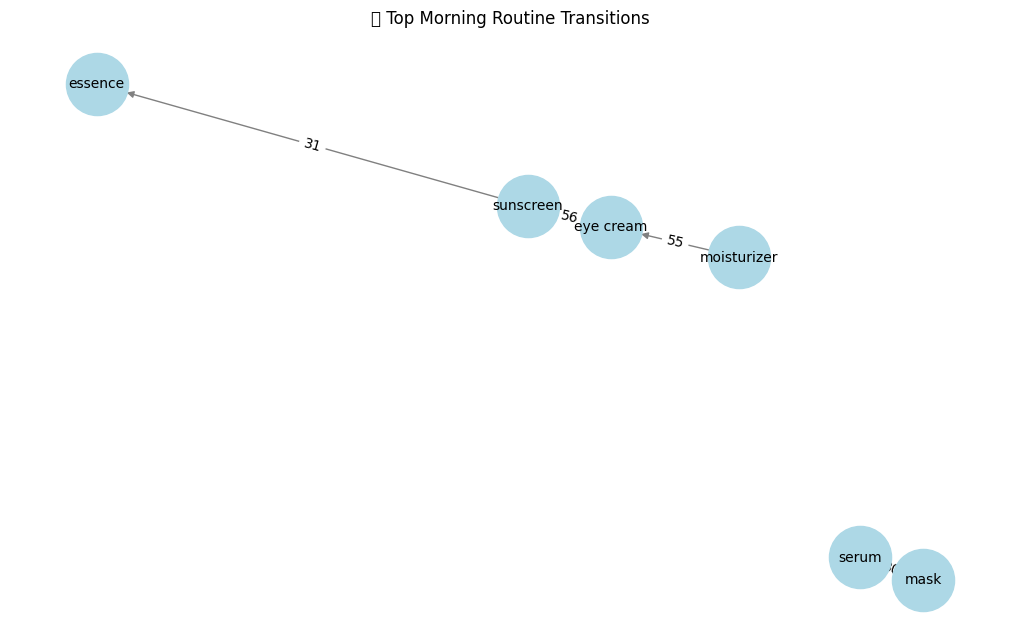

/Users/ritushetkar/env_capstone/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


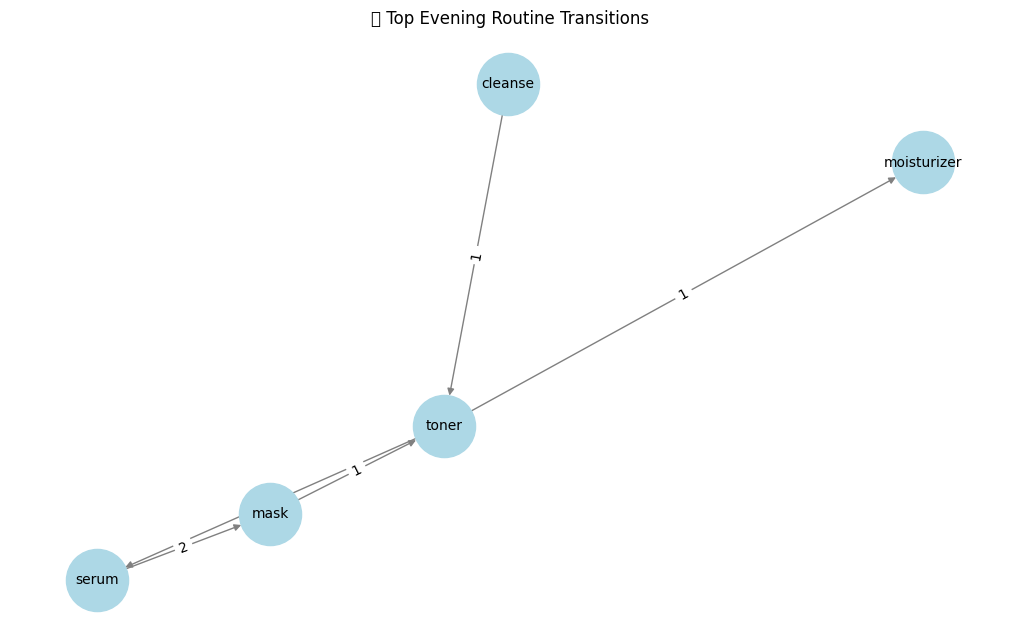

In [86]:
import matplotlib.pyplot as plt
import networkx as nx

# For demo purposes, let's limit to top 10 transitions for clarity
top_n = 5
morning_edges = list(morning_transitions.items())[:top_n]
evening_edges = list(evening_transitions.items())[:top_n]

# Helper function to create a directed graph from transitions
def create_graph(edges, title):
    G = nx.DiGraph()
    G.add_weighted_edges_from([(a, b, w) for (a, b), w in edges])
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot graphs
create_graph(morning_edges, "🌅 Top Morning Routine Transitions")
create_graph(evening_edges, "🌙 Top Evening Routine Transitions")


In [87]:

# Display sample rows for morning and evening
morning_examples = df_sentence_level[df_sentence_level['time_of_day'] == 'morning']
evening_examples = df_sentence_level[df_sentence_level['time_of_day'] == 'night']

morning_examples

,sentence,step,time_of_day,sentiment,video_id
6,[music] anxiety [music] [music] [music] a woma...,cleanse,morning,positive,NaN
8,[music] anxiety [music] [music] [music] a woma...,cleanse,morning,positive,NaN
10,[music] anxiety [music] [music] [music] a woma...,cleanse,morning,positive,NaN
12,[music] anxiety [music] [music] [music] a woma...,cleanse,morning,positive,NaN
15,featured in the video are the centella mild cl...,sunscreen,morning,positive,NaN
...,...,...,...,...,...
108613,the content creator shares his favorite produc...,sunscreen,morning,positive,7.497919e+18
108614,the content creator shares his favorite produc...,cleanse,morning,positive,7.497919e+18
108615,the content creator shares his favorite produc...,sunscreen,morning,positive,7.497919e+18
108616,the content creator shares his favorite produc...,cleanse,morning,positive,7.497919e+18


In [88]:
## 
morning_examples[morning_examples['video_id']==7483837390394559766]

,sentence,step,time_of_day,sentiment,video_id


So the approach above was good to find routines, if from the data we could validate what really were the routine steps. After even the sentence level matching, the frequency of routine steps was really low to make the right interpretation.

In [93]:
# Import libraries
import pandas as pd
import spacy
from spacy.matcher import PhraseMatcher
from collections import Counter
from itertools import chain
import plotly.graph_objects as go
from tqdm import tqdm

# Load csv file with comments
df = pd.read_csv("../../data/filtered_data/comments_posts_transcripts.csv")
comments = df['comment'].dropna().tolist()

#SAMPLE_SIZE = 500  # Speed up for test
#comments = comments[:SAMPLE_SIZE]

Define product and ingredient synonyms

In [94]:
# Ingredient synonym groups (EN/DE) mapped to unified names
ingredient_map = {
    "hyaluronic acid": ["hyaluronic acid", "hyaluronsäure"],
    "glycerin": ["glycerin"],
    "panthenol": ["panthenol"],
    "squalane": ["squalane", "squalan"],
    "aloe vera": ["aloe vera"],
    "niacinamide": ["niacinamide", "niacinamid"],
    "vitamin c": ["vitamin c"],
    "alpha arbutin": ["alpha arbutin", "alpha-arbutin"],
    "licorice root": ["licorice root", "lakritzextrakt"],
    "kojic acid": ["kojic acid", "kojicsäure"],
    "retinol": ["retinol"],
    "peptides": ["peptides", "peptide"],
    "bakuchiol": ["bakuchiol"],
    "coenzyme q10": ["coenzyme q10", "coenzym q10"],
    "ceramides": ["ceramides", "ceramide"],
    "salicylic acid": ["salicylic acid", "salicylsäure"],
    "glycolic acid": ["glycolic acid", "glycolsäure"],
    "lactic acid": ["lactic acid", "milchsäure"],
    "pha": ["pha"],
    "benzoyl peroxide": ["benzoyl peroxide", "benzoylperoxid"],
    "centella asiatica": ["centella asiatica", "tigergras"],
    "green tea": ["green tea", "grüner tee"],
    "allantoin": ["allantoin"],
    "calendula": ["calendula", "ringelblume"],
    "chamomile": ["chamomile", "kamille"]
}

# Product synonym groups (EN/DE) mapped to unified names
product_map = {
    "cleanser": ["cleanser", "reiniger", "gesichtsreinigung", "face wash"],
    "toner": ["toner", "gesichtswasser"],
    "serum": ["serum"],
    "essence": ["essence", "essenz"],
    "moisturizer": ["moisturizer", "feuchtigkeitscreme"],
    "sunscreen": ["sunscreen", "sonnencreme"],
    "eye cream": ["eye cream", "augencreme"],
    "exfoliator": ["exfoliator", "peeling"],
    "spot treatment": ["spot treatment", "punktbehandlung"],
    "micellar water": ["micellar water", "mizellenwasser"],
    "night cream": ["night cream", "nachtcreme"],
    "face oil": ["face oil", "gesichtsöl"],
    "mask": ["mask", "maske"]
}

In [95]:
# build a list of all terms for matching
all_ingredient_terms = [term for group in ingredient_map.values() for term in group]
all_product_terms = [term for group in product_map.values() for term in group]
all_keywords = list(set(all_ingredient_terms + all_product_terms))

nlp = spacy.blank("xx")  # multilingual pipeline
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(term) for term in all_keywords]
matcher.add("SKINCARE", patterns)

# Normalize Matched Terms to Unified Names
def normalize_term(term):
    term_lower = term.lower()
    for name, synonyms in {**ingredient_map, **product_map}.items():
        if term_lower in synonyms:
            return name
    return term_lower

# process all comments in batch (pipe)
results = []

for doc in tqdm(nlp.pipe(comments, batch_size=50), total=len(comments)):
    matches = matcher(doc)
    matched = [doc[start:end].text for _, start, end in matches]
    normalized = [normalize_term(t) for t in matched]

    sequence = [token.text for token in doc if token.text.lower() in all_keywords]
    normalized_sequence = [normalize_term(t) for t in sequence]

    results.append({
        "normalized_items": normalized,
        "routine_sequence": normalized_sequence
    })

results_df = pd.DataFrame(results)

# Frequency analysis
all_normalized = list(chain.from_iterable(results_df['normalized_items']))
freq = Counter(all_normalized)
top_items_df = pd.DataFrame(freq.most_common(30), columns=['Item', 'Frequency'])
top_items_df.head(30)

100%|██████████| 34830/34830 [00:02<00:00, 15649.73it/s]


,Item,Frequency
0,cleanser,520
1,serum,467
2,mask,436
3,toner,435
4,moisturizer,308
5,sunscreen,288
6,vitamin c,140
7,retinol,138
8,micellar water,57
9,eye cream,56


Sankey diagramm (common routines)

In [96]:
# Extract 2-step transitions
routine_sequences = results_df['routine_sequence'].dropna().tolist()
routine_sequences = [tuple(seq) for seq in routine_sequences if len(seq) > 1]

edges = []
for routine in routine_sequences:
    for i in range(len(routine) - 1):
        edges.append((routine[i], routine[i + 1]))

edge_counts = Counter(edges)

# Sankey input
labels = list(set([e[0] for e in edge_counts] + [e[1] for e in edge_counts]))
label_to_index = {label: i for i, label in enumerate(labels)}
source_indices = [label_to_index[src] for (src, tgt) in edge_counts]
target_indices = [label_to_index[tgt] for (src, tgt) in edge_counts]
values = list(edge_counts.values())

# Plot Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="gray", width=0.5), label=labels),
    link=dict(source=source_indices, target=target_indices, value=values)
)])
fig.update_layout(title_text="Skincare Routine Flow (All Comments)", font_size=12)
fig.show()


Common routines and example comment

In [97]:
# Helper function to remove consecutive duplicates from a routine
def remove_consecutive_duplicates(seq):
    return [x for i, x in enumerate(seq) if i == 0 or x != seq[i - 1]]

# Extract routine sequences from the DataFrame
routine_sequences = results_df['routine_sequence'].dropna().tolist()

# Clean each sequence and filter out short ones
routine_sequences = [
    tuple(remove_consecutive_duplicates(seq))
    for seq in routine_sequences
    if len(remove_consecutive_duplicates(seq)) > 1
]

# Count how often each cleaned routine occurs
from collections import Counter
routine_counts = Counter(routine_sequences)

# Create a DataFrame from the routine counts
routine_df = pd.DataFrame([
    {"Routine": " → ".join(routine), "Frequency": count}
    for routine, count in routine_counts.items()
])

# Filter routines by minimum frequency (e.g. at least 10)
routine_df = routine_df[routine_df['Frequency'] >= 10].sort_values(by='Frequency', ascending=False)

# Find an example comment for each routine
examples = []

for i, seq in enumerate(results_df['routine_sequence']):
    if not isinstance(seq, list) or len(seq) < 2:
        continue

    cleaned_seq = tuple(remove_consecutive_duplicates(seq))
    
    if cleaned_seq in routine_counts and routine_counts[cleaned_seq] >= 10:
        examples.append({
            "Routine": " → ".join(cleaned_seq),
            "ExampleComment": comments[i]
        })

# Create example DataFrame and remove duplicates per routine
example_df = pd.DataFrame(examples).drop_duplicates(subset="Routine")

# Merge example comments with the routine frequency table
routine_df = routine_df.merge(example_df, on="Routine", how="left")

# Display routine with frequency and example comment
print(routine_df[['Routine', 'Frequency', 'ExampleComment']])


                  Routine  Frequency  \
0  cleanser → moisturizer         14   
1           toner → serum         13   
2     serum → moisturizer         11   

                                      ExampleComment  
0                cleanser and moisturizer all u need  
1                           why toner after serum...  
2  Which rentinol is good for dry and acne prone ...  


Even from the comments there was a low frequency of mentions, so this approach was deprioritized. 